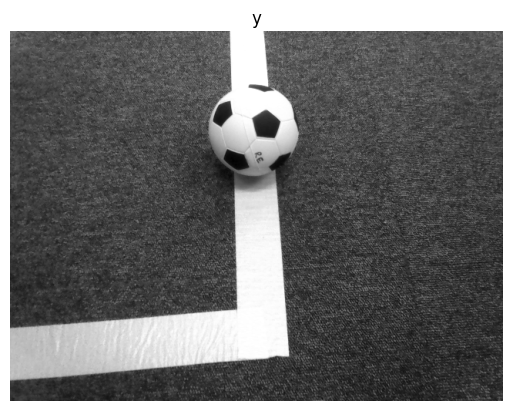

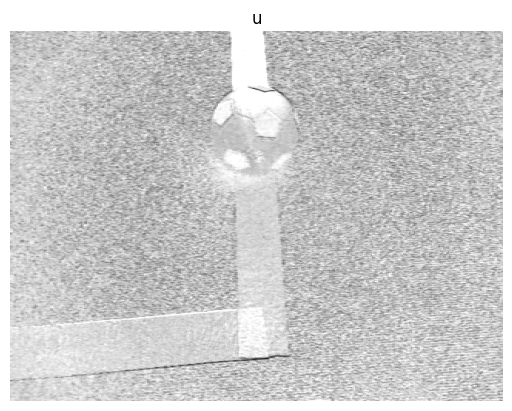

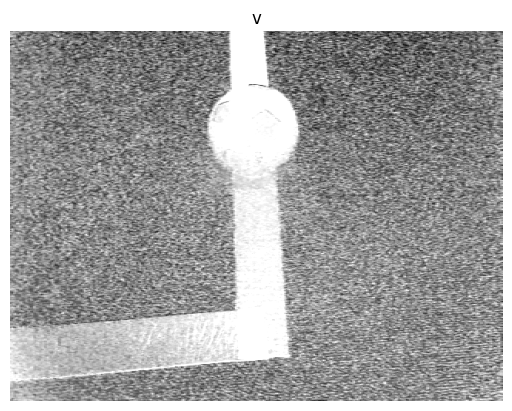

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

def create_grid_separately(image_path, letter):
    # Open the image
    img = Image.open(image_path)
    width, height = img.size
    # Resize the image to 32x32 pixels
    #img = img.resize((32, 32))
    
    # Convert the image to YUV format
    img_yuv = img.convert('YCbCr')
    
    # Create a blank image for the grid
    grid_img = Image.new('L', (width, height)) #grid_img = Image.new('L', (32, 32))  # 'L' mode for grayscale
    
    # Iterate through each pixel in the resized image
    for i in range(width):
        for j in range(height):

            if letter == "y":
                # Get the YUV values of the pixel
                y_value, _, _ = img_yuv.getpixel((i, j))
                
                # Invert the value to represent superior Y value as black and lower Y value as white
                gray_value = y_value
            if letter == "u":
                # Get the YUV values of the pixel
                _, u_value, _ = img_yuv.getpixel((i, j))
                
                # Invert the value to represent superior Y value as black and lower Y value as white
                gray_value = u_value +128
            if letter == "v":
                # Get the YUV values of the pixel
                _, _, v_value = img_yuv.getpixel((i, j))
                
                # Invert the value to represent superior Y value as black and lower Y value as white
                gray_value = v_value + 128
            
            # Set the grayscale intensity of the corresponding cell in the grid based on the inverted Y value
            grid_img.putpixel((i, j), gray_value)
    
    # Display the grid image
    plt.imshow(grid_img, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.title(str(letter))
    plt.show()


# Example usage
image_path = "images/alfie_lm_ball_line0055.png"  # Path to your image
create_grid_separately(image_path, letter = "y")
create_grid_separately(image_path, letter = "u")

create_grid_separately(image_path, letter = "v")


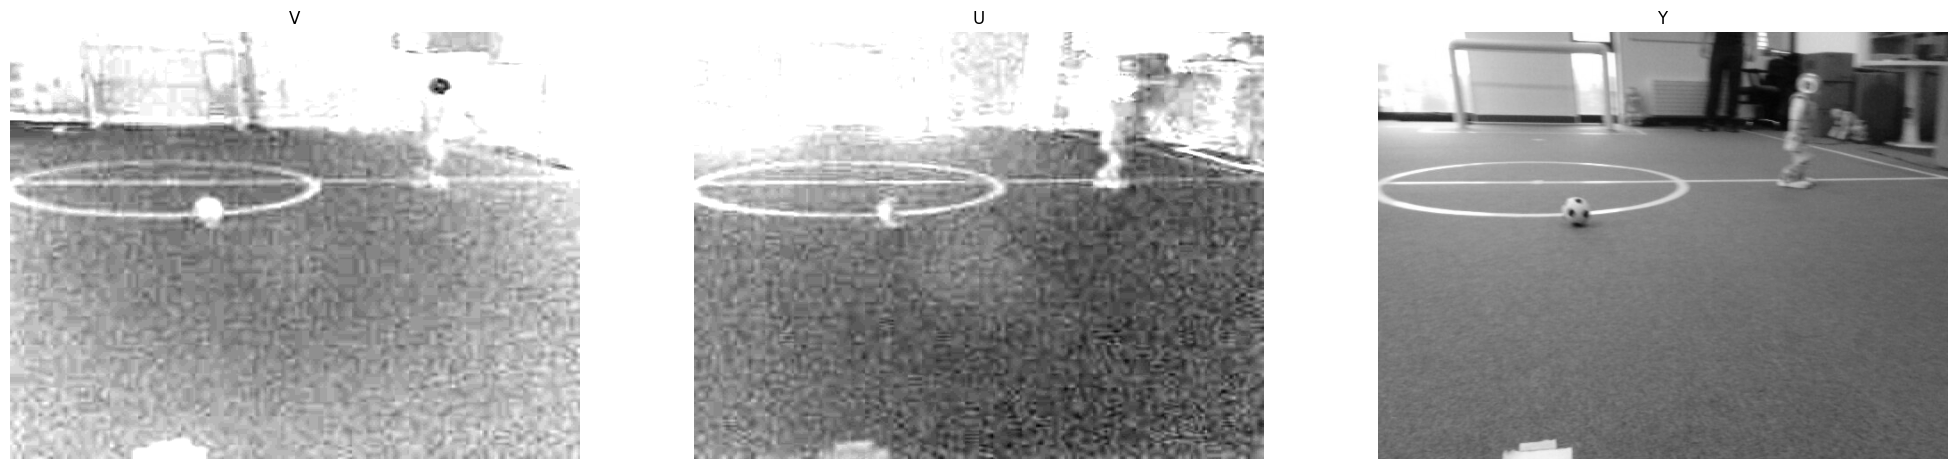

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

def create_grid(image_path):
    # Open the image
    img = Image.open(image_path)
    width, height = img.size
    
    # Convert the image to YUV format
    img_yuv = img.convert('YCbCr')
    
    # Create a figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(25, 7))
    
    
        
    # Iterate through each component (Y, U, V)
    for i, letter in enumerate(['V', 'U', 'Y']):
        # Create a blank image for the grid
        grid_img = Image.new('L', (width, height)) #grid_img = Image.new('L', (32, 32))  # 'L' mode for grayscale 
        # Iterate through each pixel in the image
        for x in range(width):
            for y in range(height):
                black = False
                # Get the YUV values of the pixel
                if letter == "Y":
                    value, _, _ = img_yuv.getpixel((x, y))        
                    if black and value < 20:   
                        value = 255         
                elif letter == "U":
                    _, value, _ = img_yuv.getpixel((x, y))
                    value += 128  # Shift range to 0-255 from -127 128
                elif letter == "V":
                    _, _, value = img_yuv.getpixel((x, y))
                    value += 128  # Shift range to 0-255 from -127 128
                    if value >110:
                        black = True
                    
                # Set the grayscale intensity of the corresponding cell in the grid based on the YUV value
                grid_img.putpixel((x, y), value)
        
        # Display the grid image in the corresponding subplot
        axs[i].imshow(grid_img, cmap='gray')
        axs[i].axis('off')  # Turn off axis
        axs[i].set_title(letter)
    
    # Show the plot
    plt.show()

# Example usage
image_path = "images/danu_gaolie_shots_on_goal_3342_upper.png"  # Path to your image
create_grid(image_path)


In [5]:
import cv2
import numpy as np

def nothing(x):
    pass

# Load image

image_path = "images/danu_gaolie_shots_on_goal_3342_upper.png" # # Path to your image
image = cv2.imread(image_path)

# Create a window
cv2.namedWindow('image')

# Create trackbars for color change
# Hue is from 0-179 for Opencv
cv2.createTrackbar('HMin', 'image', 0, 179, nothing)
cv2.createTrackbar('SMin', 'image', 0, 255, nothing)
cv2.createTrackbar('VMin', 'image', 0, 255, nothing)
cv2.createTrackbar('HMax', 'image', 0, 179, nothing)
cv2.createTrackbar('SMax', 'image', 0, 255, nothing)
cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# Set default value for Max HSV trackbars
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize HSV min/max values
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

while(1):
    # Get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin', 'image')
    sMin = cv2.getTrackbarPos('SMin', 'image')
    vMin = cv2.getTrackbarPos('VMin', 'image')
    hMax = cv2.getTrackbarPos('HMax', 'image')
    sMax = cv2.getTrackbarPos('SMax', 'image')
    vMax = cv2.getTrackbarPos('VMax', 'image')

    # Set minimum and maximum HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Convert to HSV format and color threshold
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Print if there is a change in HSV value
    if((phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display result image
    cv2.imshow('image', result)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 232, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 225, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 215, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 207, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 200, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 196, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 190, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 184, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 182, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 180, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 177, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 175, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 174, vMax = 255)
(hMin 

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [7]:
import cv2
import numpy as np

def nothing(x):
    pass

# Load image
image_path = "images/alfie_lm_ball_line0055.png"  #"images/danu_gaolie_shots_on_goal_3342_upper.png"  # Path to your image
image = cv2.imread(image_path)

# Create a window
cv2.namedWindow('image')

# Create trackbars for color change
cv2.createTrackbar('YMin', 'image', 0, 255, nothing)
cv2.createTrackbar('UMin', 'image', 0, 255, nothing)
cv2.createTrackbar('VMin', 'image', 0, 255, nothing)
cv2.createTrackbar('YMax', 'image', 0, 255, nothing)
cv2.createTrackbar('UMax', 'image', 0, 255, nothing)
cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# Set default value for Max YUV trackbars
cv2.setTrackbarPos('YMax', 'image', 255)
cv2.setTrackbarPos('UMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize YUV min/max values
yMin = uMin = vMin = yMax = uMax = vMax = 0
pyMin = puMin = pvMin = pyMax = puMax = pvMax = 0

while(1):
    # Get current positions of all trackbars
    yMin = cv2.getTrackbarPos('YMin', 'image')
    uMin = cv2.getTrackbarPos('UMin', 'image')
    vMin = cv2.getTrackbarPos('VMin', 'image')
    yMax = cv2.getTrackbarPos('YMax', 'image')
    uMax = cv2.getTrackbarPos('UMax', 'image')
    vMax = cv2.getTrackbarPos('VMax', 'image')

    # Set minimum and maximum YUV values to display
    lower = np.array([yMin, uMin, vMin])
    upper = np.array([yMax, uMax, vMax])

    # Convert to YUV format and color threshold
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    mask = cv2.inRange(yuv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Print if there is a change in YUV value
    if((pyMin != yMin) | (puMin != uMin) | (pvMin != vMin) | (pyMax != yMax) | (puMax != uMax) | (pvMax != vMax) ):
        print("(yMin = %d , uMin = %d, vMin = %d), (yMax = %d , uMax = %d, vMax = %d)" % (yMin , uMin , vMin, yMax, uMax , vMax))
        pyMin = yMin
        puMin = uMin
        pvMin = vMin
        pyMax = yMax
        puMax = uMax
        pvMax = vMax

    # Display result image
    cv2.imshow('image', result)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


(yMin = 0 , uMin = 0, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 1, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 2, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 3, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 8, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 14, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 22, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 29, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 36, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 44, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 50, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 55, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 60, vMin = 0), (yMax = 255 , uMax = 255, vMax = 255)
(yMin = 0 , uMin = 65, vMin = 0), (yMax = 255 , uMax = 255, vMax = 25

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'
